In [59]:
!pip install insightface
!pip install onnxruntime

In [60]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd

import insightface
import onnxruntime
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
from insightface.model_zoo import get_model

##Initialize the FaceAnalysis with the 'buffalo_l' model

In [61]:

app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [62]:
!wget https://huggingface.co/CountFloyd/deepfake/resolve/main/inswapper_128.onnx -O inswapper_128.onnx

--2025-01-18 00:20:20--  https://huggingface.co/CountFloyd/deepfake/resolve/main/inswapper_128.onnx
Resolving huggingface.co (huggingface.co)... 18.160.143.32, 18.160.143.76, 18.160.143.99, ...
Connecting to huggingface.co (huggingface.co)|18.160.143.32|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/f7/d7/f7d7d940dac099fff8d8e8a39c964e80ea9a852a5d0f4926ef9d25d2dda69273/e4a3f08c753cb72d04e10aa0f7dbe3deebbf39567d4ead6dce08e98aa49e16af?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27inswapper_128.onnx%3B+filename%3D%22inswapper_128.onnx%22%3B&Expires=1737418820&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNzQxODgyMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9mNy9kNy9mN2Q3ZDk0MGRhYzA5OWZmZjhkOGU4YTM5Yzk2NGU4MGVhOWE4NTJhNWQwZjQ5MjZlZjlkMjVkMmRkYTY5MjczL2U0YTNmMDhjNzUzY2I3MmQwNGUxMGFhMGY3ZGJlM2RlZWJiZjM5NTY3ZDRlYWQ2ZGNlMDhlOThhYTQ5ZTE2YWY%7EcmVzcG9uc2UtY29udGVu

In [63]:
!md5sum inswapper_128.onnx

a3a155b90354160350efd66fed6b3d80  inswapper_128.onnx


In [64]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', )


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


##swap a face

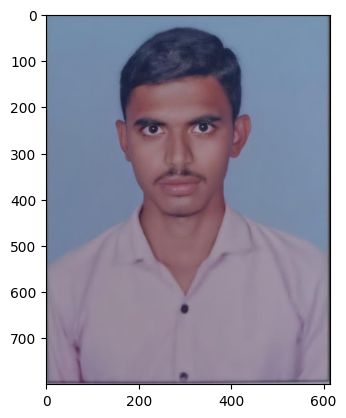

In [65]:
rob = cv2.imread('/content/drive/MyDrive/Remini20220226201732922 (1).jpg')
plt.imshow(rob[:,:,::-1])
plt.show()



##Face Swapping in 2 Images

In [66]:
def swap_face(img1_fn, img2_fn, app, swapper, plot_before=True, Plot_after=True):
  """
  Uses face swapper to Swap faces in an different images.

  returns images with swapped faces.
  Assumes one face per image.
  But it was done as many faces as we can
  """

  img1 = cv2.imread(img1_fn)
  img2 = cv2.imread(img2_fn)

  if plot_before:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1[:,:,::-1])
    axs[0].axis('off')
    axs[1].imshow(img2[:,:,::-1])
    axs[1].axis('off')
    plt.show()

  face1 = app.get(img1)[0]
  face2 = app.get(img2)[0]

  img1_ = img1.copy()
  img2_ = img2.copy()
  if Plot_after:
    img1_ = swapper.get(img1_, face1, face2, paste_back=True)
    img2_ = swapper.get(img2_, face2, face1, paste_back=True)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1_[:,:,::-1])
    axs[0].axis('off')
    axs[1].imshow(img2_[:,:,::-1])
    axs[1].axis('off')
    plt.show()

  return img1_, img2_


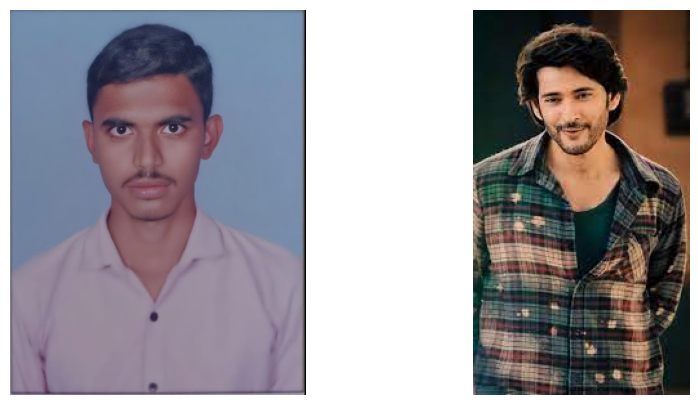

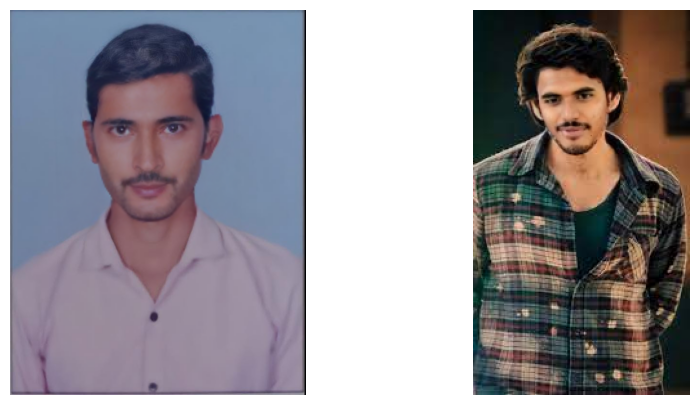

In [67]:
swap = swap_face('/content/drive/MyDrive/Remini20220226201732922 (1).jpg', '/content/drive/MyDrive/maheshbabu.jpg', app, swapper)
